## Taylor series of $sin(x)$

$$ sin(x) = \sum_{n=0}^{\infty} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

# **Interactive Taylor Series of** $$f(x) = sin(x)$$



```

# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -40, 40, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 50])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -40, 40, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=1)

x   = SR.var('x')
x0  = 0
f   = sin(x)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = sin(x)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('sin_of_x_taylor_animation_1.gif')
```



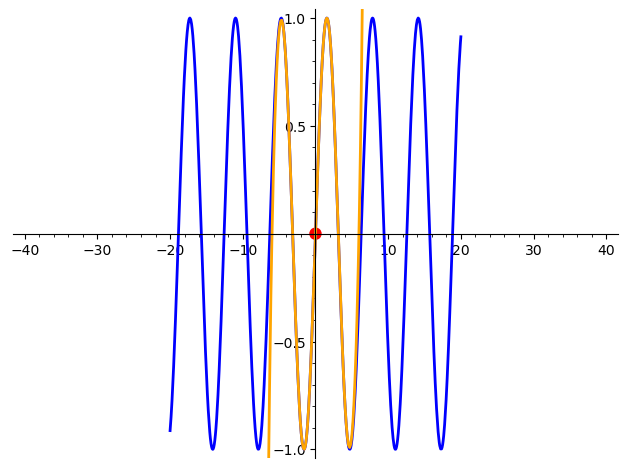

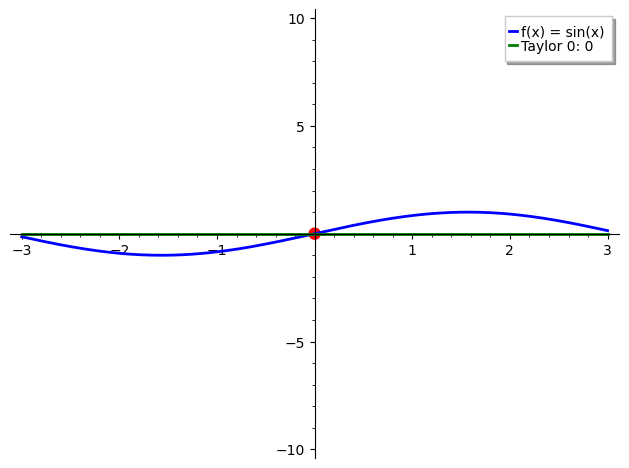

What is value of the partial Taylor series of $sin(x)$ up to the  $n$-th term of $sin(x)$ about $0$ (Maclaurin  series) for $x=2$

$$ sin(x) \approx \sum_{i=0}^{n} (-1)^{i}\frac{x^{2i+1}}{(2i+1)!}  = x - \frac{x^3}{3!}+ \frac{x^5}{5!} +\cdots+ (-1)^{n}\frac{x^{2n+1}}{(2n+1)!}$$

In [ ]:
# ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]
import math

n = 10
x = 2
sin_of_x = 0
for i in range(n+1):
    sin_of_x += ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
    print('sin_of_x ≈ ∑_{i=1}^'+str(i),'[(-1)^n][(x^(2i+1))/((2i+1)!)] =',sin_of_x, )  
print('math.sin(x) = ',math.sin(x))

sin_of_x ≈ ∑_{i=1}^0 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 2.0
sin_of_x ≈ ∑_{i=1}^1 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.6666666666666667
sin_of_x ≈ ∑_{i=1}^2 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.9333333333333333
sin_of_x ≈ ∑_{i=1}^3 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.9079365079365079
sin_of_x ≈ ∑_{i=1}^4 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.909347442680776
sin_of_x ≈ ∑_{i=1}^5 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.9092961359628027
sin_of_x ≈ ∑_{i=1}^6 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.9092974515196738
sin_of_x ≈ ∑_{i=1}^7 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.9092974264614476
sin_of_x ≈ ∑_{i=1}^8 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.909297426829951
sin_of_x ≈ ∑_{i=1}^9 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.909297426825641
sin_of_x ≈ ∑_{i=1}^10 [(-1)^n][(x^(2i+1))/((2i+1)!)] = 0.909297426825682
math.sin(x) =  0.9092974268256817


# What is the minimun $n$ for which the error between the Taylor series for $sin(x)$ about $0$ (Maclaurin  series) for $x$ and *math.exp(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{i=0}^{n} \frac{x^i}{i!} - math.exp(x) \right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)] | < epsilon 
import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]".center(21)," ","delta".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0

while  epsilon <= error:
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  error = abs(math.sin(x) - e_to_x)
  print(format(i, '10'),"  ", format(e_to_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.exp(x) = ',math.exp(x))

         n   ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]           delta               error              epsilon       
         0    4.000000000000000000    4.00000000000000000   4.75680249530792842    1e-05
         1    -6.666666666666666075    -10.66666666666666607   5.90986417135873765    1e-05
         2    1.866666666666667140    8.53333333333333321   2.62346916197459556    1e-05
         3    -1.384126984126983650    -3.25079365079365079   0.62732448881905545    1e-05
         4    -0.661728395061727870    0.72239858906525578   0.09507410024620033    1e-05
         5    -0.766804553471219563    -0.10507615840949175   0.01000205816329136    1e-05
         6    -0.756027511583066580    0.01077704188815300   0.00077498372486162    1e-05
         7    -0.756848619536449663    -0.00082110795338309   0.00004612422852146    1e-05
         8    -0.756800319068603566    0.00004830046784606   0.00000217623932464    1e-05
n = 8
x = 4
e_to_x ≈ ∑_{i=0}^8 x^i/i! = -0.7568003190686036
epsilon 

# What is the minimun $n$ for which the $n$-th term of the Taylor series for $e^x$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n!}\right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)] | < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 1
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]           delta           epsilon 
         0    1.00000000000000000    1.00000000000000000    1e-05
         1    0.83333333333333337    -0.16666666666666666    1e-05
         2    0.84166666666666667    0.00833333333333333    1e-05
         3    0.84146825396825398    -0.00019841269841270    1e-05
         4    0.84147100970017641    0.00000275573192240    1e-05
n =  4
x =  1
e_to_x ≈ 0.8414710097001764
epsilon = 1e-05
math.sin(x) =  0.8414709848078965


In [ ]:
# Returns Min n, |∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)] | < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -1
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]           delta           epsilon 
         0    -1.00000000000000000    -1.00000000000000000    1e-05
         1    -0.83333333333333337    0.16666666666666666    1e-05
         2    -0.84166666666666667    -0.00833333333333333    1e-05
         3    -0.84146825396825398    0.00019841269841270    1e-05
         4    -0.84147100970017641    -0.00000275573192240    1e-05
n =  4
x =  -1
e_to_x ≈ -0.8414710097001764
epsilon = 1e-05
math.sin(x) =  -0.8414709848078965


In [ ]:
# Returns Min n, |∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)] | < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 4
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," deltax".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!            deltax           epsilon 
         0    4.00000000000000000    4.00000000000000000    1e-05
         1    -6.66666666666666607    -10.66666666666666607    1e-05
         2    1.86666666666666714    8.53333333333333321    1e-05
         3    -1.38412698412698365    -3.25079365079365079    1e-05
         4    -0.66172839506172787    0.72239858906525578    1e-05
         5    -0.76680455347121956    -0.10507615840949175    1e-05
         6    -0.75602751158306658    0.01077704188815300    1e-05
         7    -0.75684861953644966    -0.00082110795338309    1e-05
         8    -0.75680031906860357    0.00004830046784606    1e-05
         9    -0.75680257873961387    -0.00000225967101034    1e-05
n =  9
x =  4
e_to_x ≈ -0.7568025787396139
epsilon = 1e-05
math.sin(x) =  -0.7568024953079282


In [ ]:

import math

x = -4
epsilon = 10**(-5)

e_to_x = 0

delta = 1
i = 0
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!             delta           epsilon 
         0    -4.00000000000000000    -4.00000000000000000    1e-05
         1    6.66666666666666607    10.66666666666666607    1e-05
         2    -1.86666666666666714    -8.53333333333333321    1e-05
         3    1.38412698412698365    3.25079365079365079    1e-05
         4    0.66172839506172787    -0.72239858906525578    1e-05
         5    0.76680455347121956    0.10507615840949175    1e-05
         6    0.75602751158306658    -0.01077704188815300    1e-05
         7    0.75684861953644966    0.00082110795338309    1e-05
         8    0.75680031906860357    -0.00004830046784606    1e-05
         9    0.75680257873961387    0.00000225967101034    1e-05
n =  9
x =  -4
e_to_x ≈ ∑_{i=0}^9 x^i/i! = 0.7568025787396139
epsilon = 1e-05
math.sin(x) =  0.7568024953079282


# For  $x$ negative  and less than  $-9$ at the middle phase of the algorithm there are problems caused by rounding errors due to differences that produce wrong answers.

https://stackoverflow.com/questions/69978341/error-of-taylor-series-ex-for-negative-x


In [ ]:

import math

x = -9
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!             delta           epsilon 
         0    -9.00000000000000000    -9.00000000000000000    1e-05
         1    112.50000000000000000    121.50000000000000000    1e-05
         2    -379.57499999999998863    -492.07499999999998863    1e-05
         3    569.42678571428564283    949.00178571428568830    1e-05
         4    -498.20022321428587020    -1067.62700892857151302    1e-05
         5    287.96148336038947946    786.16170657467534966    1e-05
         6    -120.23786428415348837    -408.19934764454296783    1e-05
         7    37.21045552159878866    157.44831980575227703    1e-05
         8    -9.67672794996715169    -46.88718347156594035    1e-05
         9    1.42813129329846511    11.10485924326561680    1e-05
        10    -0.71352013218847521    -2.14165142548694032    1e-05
        11    -0.37068660360262112    0.34283352858585409    1e-05
        12    -0.41696912996171143    -0.04628252635909030    1e-05
        13    -0.41162883845

In [ ]:
# Returns Min n, |x^{n}/(n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = -10
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!             delta           epsilon 
         0    -10.00000000000000000    -10.00000000000000000    1e-05
         1    156.66666666666665719    166.66666666666665719    1e-05
         2    -676.66666666666674246    -833.33333333333337123    1e-05
         3    1307.46031746031735565    1984.12698412698409811    1e-05
         4    -1448.27160493827182108    -2755.73192239858917674    1e-05
         5    1056.93923360590019911    2505.21083854417202019    1e-05
         6    -548.96515007626135230    -1605.90438368216155141    1e-05
         7    215.75122310572032802    764.71637318198168032    1e-05
         8    -65.39450232883172021    -281.14572543455204823    1e-05
         9    16.81185013741158230    82.20635246624330250    1e-05
        10    -2.76109092597967987    -19.57294106339126216    1e-05
        11    1.10707924465100405    3.86817017063068391    1e-05
        12    0.46238421621255665    -0.64469502843844739    1e-05
        13    0.5

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = -35
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!             delta           epsilon 
         0    -35.00000000000000000    -35.00000000000000000    1e-05
         1    7110.83333333333303017    7145.83333333333303017    1e-05
         2    -430571.45833333337213844    -437682.29166666668606922    1e-05
         3    12335162.04861111007630825    12765733.50694444403052330    1e-05
         4    -204859609.42370757460594177    -217194771.47231867909431458    1e-05
         5    2213900345.60893249511718750    2418759955.03263998031616211    1e-05
         6    -16779567249.99993896484375000    -18993467595.60887145996093750    1e-05
         7    94015660391.05180358886718750    110795227641.05174255371093750    1e-05
         8    -404970199389.42016601562500000    -498985859780.47198486328125000    1e-05
         9    1382332953333.03076171875000000    1787303152722.45092773437500000    1e-05
        10    -3830634575440.78466796875000000    -5212967528773.81542968750000000    1e-05
        11    87

In [ ]:
import math

x = -43
epsilon = 10**(-5)

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=10}^n x^i/i!".center(20)," "," delta =x^n/n!|.center(20)"," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( abs(delta), '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n    ∑_{i=10}^n x^i/i!      delta =x^n/n!|.center(20)    epsilon 
         0    -43.00000000000000000    43.00000000000000000    1e-05
         1    13208.16666666666606034    13251.16666666666606034    1e-05
         2    -1211862.19166666665114462    1225070.35833333339542150    1e-05
         3    52720401.91686507314443588    53932264.10853174328804016    1e-05
         4    -1332290102.75917935371398926    1385010504.67604446411132812    1e-05
         5    21948477380.38633346557617188    23280767483.14551162719726562    1e-05
         6    -253988311570.48580932617187500    275936788950.87213134765625000    1e-05
         7    2175569415906.47851562500000000    2429557727476.96435546875000000    1e-05
         8    -14340063812420.38671875000000000    16515633228326.86523437500000000    1e-05
         9    74950596536048.53125000000000000    89290660348468.92187500000000000    1e-05
        10    -318140905807568.25000000000000000    393091502343616.75000000000000000   

#  Solution for $x$ negative  and less than  $-9$
**Solution** for $e^{-x}$  calculate $e^{x}$ and return $1/e^{x}$

$$e^{-x}  = 1/e^{x}  $$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math

x = - 43
epsilon = 10**(-5)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," ","|delta|".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  print(format(i, '10'),"  ", format(e_to_x, '.17f'),"  ",format( abs(delta), '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo
  
print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))

         n     ∑_{i=0}^n x^i/i!           |delta|           epsilon 
         0    43.00000000000000000    43.00000000000000000    1e-05
         1    -13208.16666666666606034    13251.16666666666606034    1e-05
         2    1211862.19166666665114462    1225070.35833333339542150    1e-05
         3    -52720401.91686507314443588    53932264.10853174328804016    1e-05
         4    1332290102.75917935371398926    1385010504.67604446411132812    1e-05
         5    -21948477380.38633346557617188    23280767483.14551162719726562    1e-05
         6    253988311570.48580932617187500    275936788950.87213134765625000    1e-05
         7    -2175569415906.47851562500000000    2429557727476.96435546875000000    1e-05
         8    14340063812420.38671875000000000    16515633228326.86523437500000000    1e-05
         9    -74950596536048.53125000000000000    89290660348468.92187500000000000    1e-05
        10    318140905807568.25000000000000000    393091502343616.75000000000000000    1e-05


# Efficeincy 

Additions
$$ n \text{ additions } $$

Multiplications
$$ n \text{ multiplications } $$

Divisions
$$ n \text{ divsions }$$ 

TOTAL 
$$ 3n = \Theta(n) \text{ FLOPS }$$ 

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x


delta = 1
e_to_x = 1
i = 1

while  epsilon <= abs(delta):
  delta *= x/i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ 1.0142320547350058e+304
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.001703500747680664


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = -700
epsilon = 10**(-20)

neg = False
if x < 0 :
  x = abs(x)
  neg = True

delta = 1
e_to_x = 1
i = 1

while  epsilon <= abs(delta):
  delta *= x/i 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n =  1944
x =  700
e_to_x ≈ 1.0142320547350058e+304
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.0017795562744140625


Inefficient


In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import math
import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 0
i = 0
while  epsilon <= abs(delta):
  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n =  972
x =  700
e_to_x ≈ ∑_{i=0}^972 x^i/i! = -2.1736710222832293e+286
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  0.3254232406616211


Inefficient



In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!

import time

start = time.time()

x = 700
epsilon = 10**(-20)

xo = x

if x < 0 :
   x = - x

delta = 1
e_to_x = 1
i = 1
while  epsilon <= abs(delta):
  
  x_to_i = 1
  fact_of_i = 1
  for k in range(1,i+1):
      x_to_i *= x
      fact_of_i *= k

  delta = ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  e_to_x += delta
  i = i+1

if x != xo: 
  e_to_x = 1 / e_to_x
  x = xo

end = time.time()

print("n = ",i-1) 
print('x = ',x)
print('e_to_x ≈ ',e_to_x)
print("epsilon =","{:.0e}".format(epsilon))     
print('math.sin(x) = ',math.sin(x))
print('time = ',end - start)

n =  972
x =  700
e_to_x ≈  -2.1736710222832293e+286
epsilon = 1e-20
math.sin(x) =  0.5439705233633756
time =  1.0361504554748535


# Error using the Lagrange's formula of the Residual $E_n$

For the Taylor series for $f(x) = sin(x)$ about $c=0$ (Maclaurin) 

Se tiene que la derivada $n+1$ de $sin(x) $ es $f^{(n+1)}(x) = sin(x+\frac{(n+1)\pi}{2})$, entonces el error usado es:

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} = \frac{sin(x+\frac{(n+1)\pi}{2})}{(n+1)!}x^{n+1} $$

En valor absoluto puesto que solo se necesita su magnitud:

$$ \left|\frac{sin(x+\frac{(n+1)\pi}{2})}{(n+1)!}x^{n+1}\right| $$

In [ ]:
# Retunrs Min n, |x^{2n+3}/(2n+3)!| < epsilon and ∑_{i=0}^{n+1}  [(-1)^n][(x^(2i+1))/((2i+1)!)]|
import math

x = 0.8
epsilon = 10**(-12)
sin_of_x = 0
i = 0
error = (math.sin(x+(((i+1)*math.pi)/2))/math.factorial(n+1))*x**(i+1)
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(sin_of_x, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  sin_of_x +=  ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  error = (math.sin(x+(((i+1)*math.pi)/2))/math.factorial(n+1))*x**(i+1)
  
  print(format(i, '10'),"  ", format(sin_of_x, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('sin_of_x ≈ ∑_{i=1}^'+str(i-1),'[(-1)^n][(x^(2i+1))/((2i+1)!)] =',sin_of_x)    
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]   error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         0    0.00000000000000000    0.00000001396317760    0.00000000000100000
         0    0.80000000000000004    0.00000001396317760    0.00000000000100000
         1    0.71466666666666667    -0.00000001150162083    0.00000000000100000
         2    0.71739733333333333    -0.00000000893643366    0.00000000000100000
         3    0.71735572317460317    0.00000000736103733    0.00000000000100000
         4    0.71735609304268078    0.00000000571931754    0.00000000000100000
         5    0.71735609089072105    -0.00000000471106389    0.00000000000100000
         6    0.71735609089954966    -0.00000000366036323    0.00000000000100000
         7    0.71735609089952279    0.00000000301508089    0.00000000000100000
         8    0.71735609089952290    0.00000000234263247    0.00000000000100000
         9    0.71735609089952290    -0.00000000192965177    0.00000000000100000
      

In [ ]:
# Retunrs Min n, |x^{2n+3}/(2n+3)!| < epsilon and ∑_{i=0}^{n+1}  [(-1)^n][(x^(2i+1))/((2i+1)!)]|
import math

x = -0.8
epsilon = 10**(-12)
sin_of_x = 0
i = 0
error = (math.sin(x+(((i+1)*math.pi)/2))/math.factorial(n+1))*x**(i+1)
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(sin_of_x, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  sin_of_x +=  ((-1)**i)*x**(2*i+1)/math.factorial(2*i+1) 
  error = (math.sin(x+(((i+1)*math.pi)/2))/math.factorial(n+1))*x**(i+1)
  
  print(format(i, '10'),"  ", format(sin_of_x, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('sin_of_x ≈ ∑_{i=1}^'+str(i-1),'[(-1)^n][(x^(2i+1))/((2i+1)!)] =',sin_of_x)    
print('math.sin(x) = ',math.sin(x))

         n   ∑_{i=1}^n  [(-1)^n][(x^(2i+1))/((2i+1)!)]   error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         0    0.00000000000000000    -0.00000001396317760    0.00000000000100000
         0    -0.80000000000000004    -0.00000001396317760    0.00000000000100000
         1    -0.71466666666666667    0.00000001150162083    0.00000000000100000
         2    -0.71739733333333333    0.00000000893643366    0.00000000000100000
         3    -0.71735572317460317    -0.00000000736103733    0.00000000000100000
         4    -0.71735609304268078    -0.00000000571931754    0.00000000000100000
         5    -0.71735609089072105    0.00000000471106389    0.00000000000100000
         6    -0.71735609089954966    0.00000000366036323    0.00000000000100000
         7    -0.71735609089952279    -0.00000000301508089    0.00000000000100000
         8    -0.71735609089952290    -0.00000000234263247    0.00000000000100000
         9    -0.71735609089952290    0.00000000192965177    0.0000000000010

#  Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol, pi, E, N
from sympy.functions import sin
from sympy.plotting import plot
import matplotlib.pyplot as plt

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('sin(x) ≅', taylor(sin(x), 0, 4))

sin(x) ≅ -x**3/6 + x


In [ ]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))


sin(1) = 5/6


In [ ]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


-(x - 1)**7*cos(1)/5040 - (x - 1)**6*sin(1)/720 + (x - 1)**5*cos(1)/120 + (x - 1)**4*sin(1)/24 - (x - 1)**3*cos(1)/6 - (x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)

In [ ]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = 5/6


In [ ]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = 0.833333333333333


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ x
Taylor 3 sin(x) ≅ x
Taylor 4 sin(x) ≅ -x**3/6 + x
Taylor 5 sin(x) ≅ -x**3/6 + x
Taylor 6 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 7 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 8 sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1
Taylor 3 sin(x) ≅ 1
Taylor 4 sin(x) ≅ 5/6
Taylor 5 sin(x) ≅ 5/6
Taylor 6 sin(x) ≅ 101/120
Taylor 7 sin(x) ≅ 101/120
Taylor 8 sin(x) ≅ 4241/5040


In [ ]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1.00000000000000
Taylor 3 sin(x) ≅ 1.00000000000000
Taylor 4 sin(x) ≅ 0.833333333333333
Taylor 5 sin(x) ≅ 0.833333333333333
Taylor 6 sin(x) ≅ 0.841666666666667
Taylor 7 sin(x) ≅ 0.841666666666667
Taylor 8 sin(x) ≅ 0.841468253968254


In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('sin(x)  ≅')
taylor(sin(x), 0, 8)

sin(x)  ≅


-x**7/5040 + x**5/120 - x**3/6 + x

In [ ]:
print('sin(x) ≅', taylor(sin(x), 0, 8))

sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [ ]:
print('sin(x) ≅ at around 1')
taylor(sin(x), 1, 8)

sin(x) ≅ at around 1


-(x - 1)**7*cos(1)/5040 - (x - 1)**6*sin(1)/720 + (x - 1)**5*cos(1)/120 + (x - 1)**4*sin(1)/24 - (x - 1)**3*cos(1)/6 - (x - 1)**2*sin(1)/2 + (x - 1)*cos(1) + sin(1)

In [ ]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

sin(1) = 5/6


In [ ]:
print('sin(1) =', N(taylor(sin(x), 0, 4).subs(x,1)))

sin(1) = 0.833333333333333


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ x
Taylor 3 sin(x) ≅ x
Taylor 4 sin(x) ≅ -x**3/6 + x
Taylor 5 sin(x) ≅ -x**3/6 + x
Taylor 6 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 7 sin(x) ≅ x**5/120 - x**3/6 + x
Taylor 8 sin(x) ≅ -x**7/5040 + x**5/120 - x**3/6 + x


In [ ]:
print('Taylor 0 sin(x) ≅', taylor(sin(x), 0, 0).subs(x,1))
print('Taylor 1 sin(x) ≅', taylor(sin(x), 0, 1).subs(x,1))
print('Taylor 2 sin(x) ≅', taylor(sin(x), 0, 2).subs(x,1))
print('Taylor 3 sin(x) ≅', taylor(sin(x), 0, 3).subs(x,1))
print('Taylor 4 sin(x) ≅', taylor(sin(x), 0, 4).subs(x,1))
print('Taylor 5 sin(x) ≅', taylor(sin(x), 0, 5).subs(x,1))
print('Taylor 6 sin(x) ≅', taylor(sin(x), 0, 6).subs(x,1))
print('Taylor 7 sin(x) ≅', taylor(sin(x), 0, 7).subs(x,1))
print('Taylor 8 sin(x) ≅', taylor(sin(x), 0, 8).subs(x,1))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1
Taylor 3 sin(x) ≅ 1
Taylor 4 sin(x) ≅ 5/6
Taylor 5 sin(x) ≅ 5/6
Taylor 6 sin(x) ≅ 101/120
Taylor 7 sin(x) ≅ 101/120
Taylor 8 sin(x) ≅ 4241/5040


In [ ]:
print('Taylor 0 sin(x) ≅', N(taylor(sin(x), 0, 0).subs(x,1)))
print('Taylor 1 sin(x) ≅', N(taylor(sin(x), 0, 1).subs(x,1)))
print('Taylor 2 sin(x) ≅', N(taylor(sin(x), 0, 2).subs(x,1)))
print('Taylor 3 sin(x) ≅', N(taylor(sin(x), 0, 3).subs(x,1)))
print('Taylor 4 sin(x) ≅', N(taylor(sin(x), 0, 4).subs(x,1)))
print('Taylor 5 sin(x) ≅', N(taylor(sin(x), 0, 5).subs(x,1)))
print('Taylor 6 sin(x) ≅', N(taylor(sin(x), 0, 6).subs(x,1)))
print('Taylor 7 sin(x) ≅', N(taylor(sin(x), 0, 7).subs(x,1)))
print('Taylor 8 sin(x) ≅', N(taylor(sin(x), 0, 8).subs(x,1)))

Taylor 0 sin(x) ≅ 0
Taylor 1 sin(x) ≅ 0
Taylor 2 sin(x) ≅ 1.00000000000000
Taylor 3 sin(x) ≅ 1.00000000000000
Taylor 4 sin(x) ≅ 0.833333333333333
Taylor 5 sin(x) ≅ 0.833333333333333
Taylor 6 sin(x) ≅ 0.841666666666667
Taylor 7 sin(x) ≅ 0.841666666666667
Taylor 8 sin(x) ≅ 0.841468253968254


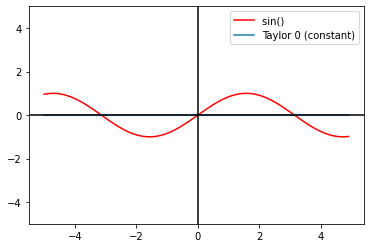

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)


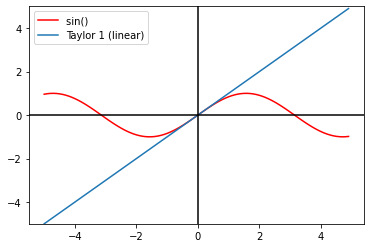

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
legends = ['sin() ','Taylor 1 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

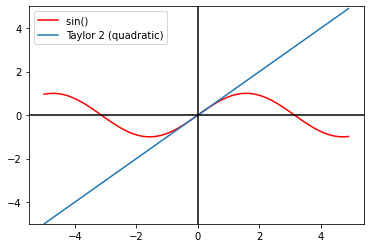

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
legends = ['sin() ','Taylor 2 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

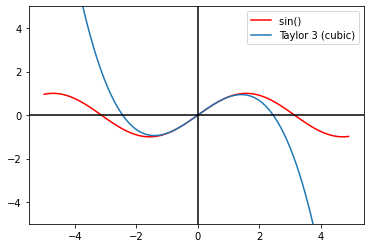

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin, color ='red')
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

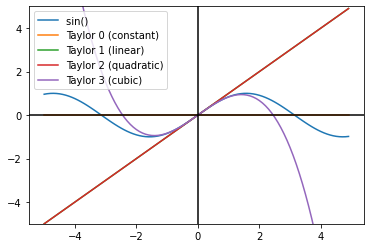

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

values = np.arange(-5,5,0.1)
p_sin = np.sin(values)
t_sin1 = [taylor(sin(x), 0, 1).subs(x,v) for v in values]
t_sin2 = [taylor(sin(x), 0, 2).subs(x,v) for v in values]
t_sin3 = [taylor(sin(x), 0, 3).subs(x,v) for v in values]
t_sin4 = [taylor(sin(x), 0, 4).subs(x,v) for v in values]
legends = ['sin() ','Taylor 0 (constant)','Taylor 1 (linear)','Taylor 2 (quadratic)','Taylor 3 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_sin)
ax.plot(values,t_sin1)
ax.plot(values,t_sin2)
ax.plot(values,t_sin3)
ax.plot(values,t_sin4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()